In [1]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import misc
from datetime import datetime
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.io import loadmat
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import copy
from matplotlib import cm
from matplotlib.animation import FuncAnimation
import scipy.optimize
import networkx as nx
import os
from sklearn import svm
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import fcluster
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
from scipy import stats
from sklearn.tree import *
from sklearn.ensemble import *


import math
from sklearn.model_selection import train_test_split

C:\Users\keipa\Anaconda2\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:

def rmse(predictions, targets):
    differences = predictions - targets                       #the DIFFERENCEs.
    differences_squared = differences ** 2                    #the SQUAREs of ^
    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^
    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^
    return rmse_val                                           #get the ^

# remove random
np.random.seed(42)

In [3]:
# task 1
# Загрузите данные с помощью библиотеки sklearn.

from sklearn.datasets import load_boston
boston = load_boston()
x = boston["data"]
y = boston["target"]


def norm(x):
    m, n = x.shape
    for columnIndex in range(n):
        column = x[:, columnIndex]
        min_value, max_value = min(column), max(column)
        denominator = max_value - min_value if (max_value - min_value) != 0 else 1
        normalize_column = (column - min_value) / denominator
        x[:, columnIndex] = normalize_column
    return x

In [4]:
# task 2
# Разделите выборку на обучающую (75%) и контрольную (25%).

x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=.75, test_size=.25, random_state=42)
features = boston.feature_names


In [5]:
# task 4
# Заведите массив для объектов DecisionTreeRegressor (они будут использоваться в качестве базовых алгоритмов) и для вещественных чисел (коэффициенты перед базовыми алгоритмами).
DecisionTreeRegressors = []
alphas = []
tree_count = 50
max_depth = 5
random_state = 42


In [6]:
# task 5
# В цикле обучите последовательно 50 решающих деревьев с параметрами max_depth=5 и random_state=42 (остальные параметры - по умолчанию). Каждое дерево должно обучаться на одном и том же множестве объектов, но ответы, которые учится прогнозировать дерево, будут меняться в соответствие с отклонением истинных значений от предсказанных.
y_shift = y_train.copy()
for i in range(tree_count):
    regressor = DecisionTreeRegressor(random_state=random_state, max_depth=max_depth)
    regressor.fit(x_train, y_shift)
    y_shift -= y_shift - regressor.predict(x_train)
    DecisionTreeRegressors.append(regressor)

print("Boosted Decision tree rmse: {}".format(rmse(DecisionTreeRegressors[-1].predict(x_test), y_test)))


Boosted Decision tree rmse: 3.32175540784


In [7]:
# task 6
# Попробуйте всегда брать коэффициент равным 0.9. Обычно оправдано выбирать коэффициент значительно меньшим - порядка 0.05 или 0.1, но на стандартном наборе данных будет всего 50 деревьев, возьмите для начала шаг побольше.

DecisionTreeRegressors = []
tree_count = 50
max_depth = 5
random_state = 42

y_shift = y_train.copy()
for i in range(tree_count):
    regressor = DecisionTreeRegressor(random_state=random_state, max_depth=max_depth)
    regressor.fit(x_train, y_shift)
    y_shift -= (y_shift - 0.9*regressor.predict(x_train))
    DecisionTreeRegressors.append(regressor)

print("0.9 Boosted Decision tree rmse: {}".format(rmse(DecisionTreeRegressors[-1].predict(x_test), y_test)))

0.9 Boosted Decision tree rmse: 22.8619094779


In [ ]:
# task 7
# В процессе реализации обучения вам потребуется функция, которая будет вычислять прогноз построенной на данный момент композиции деревьев на выборке X. Реализуйте ее. Эта же функция поможет вам получить прогноз на контрольной выборке и оценить качество работы вашего алгоритма с помощью mean_squared_error в sklearn.metrics.

def rmse(predictions, targets):
    differences = predictions - targets                       #the DIFFERENCEs.
    differences_squared = differences ** 2                    #the SQUAREs of ^
    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^
    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^
    return rmse_val                                           #get the ^

In [8]:
# task 8
# Попробуйте уменьшать вес перед каждым алгоритмом с каждой следующей итерацией по формуле 0.9 / (1.0 + i), где i - номер итерации (от 0 до 49). Какое получилось качество на контрольной выборке?

DecisionTreeRegressors = []
tree_count = 50
max_depth = 5
random_state = 42

y_shift = y_train.copy()
for i in range(tree_count):
    regressor = DecisionTreeRegressor(random_state=random_state, max_depth=max_depth)
    regressor.fit(x_train, y_shift)
    y_shift -= (y_shift - 0.9/(1.+i)*regressor.predict(x_train))
    DecisionTreeRegressors.append(regressor)

print("Incremental Boosted Decision tree rmse: {}".format(rmse(DecisionTreeRegressors[-1].predict(x_test), y_test)))


rtg_imp = GradientBoostingRegressor(random_state=random_state, max_depth=max_depth, alpha=0.9)
rtg_imp.fit(x_train, y_train)
print("Ready to go Gradient Boosting Regressor rmse: {}".format(rmse(rtg_imp.predict(x_test), y_test)))

from sklearn.linear_model import LinearRegression

Incremental Boosted Decision tree rmse: 22.9904379302
Ready to go Gradient Boosting Regressor rmse: 3.0449243991


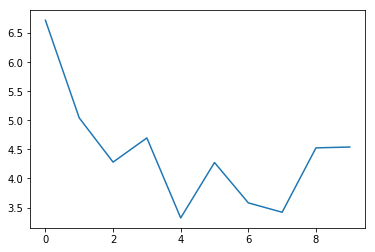

In [9]:
# task 9
# Исследуйте, переобучается ли градиентный бустинг с ростом числа итераций, а также с ростом глубины деревьев. Постройте графики. Какие выводы можно сделать?


DecisionTreeRegressors = []
tree_count = 50
max_depth = 5
random_state = 42

error_rates = []

y_shift = y_train.copy()
for i in range(10):
    regressor = DecisionTreeRegressor(random_state=random_state, max_depth=i+1)
    regressor.fit(x_train, y_train)
    DecisionTreeRegressors.append(regressor)
    error_rates.append(rmse(regressor.predict(x_test), y_test))

plt.plot(error_rates)
plt.show()
# переобучение с ростом глубины деревьев
# нет




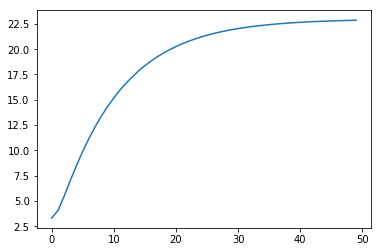

In [10]:
DecisionTreeRegressors = []
tree_count = 50
max_depth = 5
random_state = 42

error_rates = []

y_shift = y_train.copy()
for i in range(tree_count):
    regressor = DecisionTreeRegressor(random_state=random_state, max_depth=max_depth)
    regressor.fit(x_train, y_shift)
    y_shift -= (y_shift - 0.9*regressor.predict(x_train))
    DecisionTreeRegressors.append(regressor)
    error_rates.append(rmse(regressor.predict(x_test), y_test))

plt.plot(error_rates)
plt.show()

# переобучение ростом числа итераций,
# да

In [11]:
# task 10
# Сравните качество, получаемое с помощью градиентного бустинга с качеством работы линейной регрессии. Для этого обучите LinearRegression из sklearn.linear_model (с параметрами по умолчанию) на обучающей выборке и оцените для прогнозов полученного алгоритма на тестовой выборке RMSE.

from sklearn.metrics import mean_squared_error
from math import sqrt

lin = LinearRegression().fit(x_train, y_train)
y_predicted = lin.predict(x_test)

rmse = rmse(y_predicted, y_test)
print("Linear regression rmse: {}".format(rmse))

Linear regression rmse: 4.70443172916
